In [103]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import math
import matplotlib as mpl

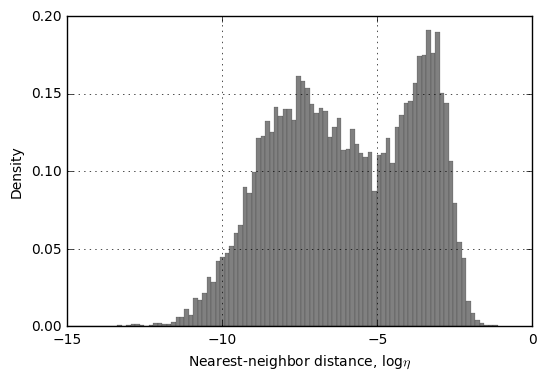

In [104]:
data = np.loadtxt('data/hs_1981_2011_06_comb_K2_A.cat_so_SCSN_v01_M3_log10eta.txt')

nnd = [x for x in data[:,0] if math.isfinite(x)]

fig=plt.figure()
ax=fig.add_subplot(111)

bins=np.linspace(min(nnd),max(nnd),100)
ax.hist(nnd,bins,normed=True,facecolor='gray',alpha=1,linewidth=0.1)

ax.grid()
ax.set_xlabel('Nearest-neighbor distance, log$\eta$')
ax.set_ylabel('Density')
ax.set_xlim([-15,0])
ax.set_xticks(np.arange(-15,1,5))
plt.show()

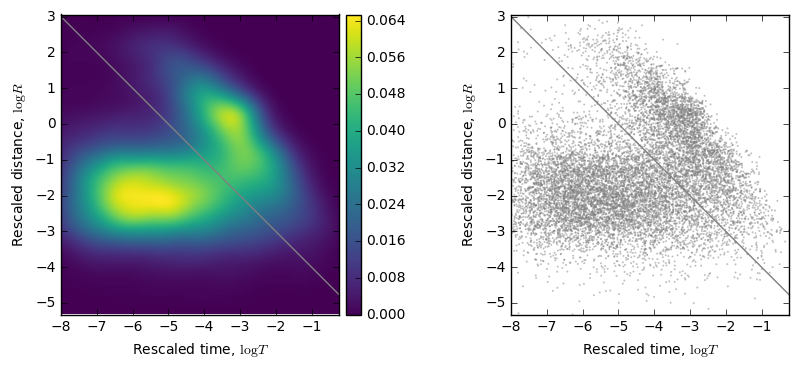

In [127]:
data = np.loadtxt('data/hs_1981_2011_06_comb_K2_A.cat_so_SCSN_v01_M3_T_R.txt')
m1=np.log10(data[:,0]); m2=np.log10(data[:,1])
xmin = m1.min(); xmax = m1.max()
ymin = m2.min(); ymax = m2.max()
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([m1, m2])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)
t=np.linspace(xmin,xmax,100)
r=-t-5

#Joint distribtuion
fig=plt.figure(figsize=(3, 3))
width = xmax-(-8); height=ymax-ymin
ax = fig.add_axes([0,0,width/height,1])
cmap=plt.cm.viridis
hist=ax.imshow(np.rot90(Z), cmap=cmap,extent=[xmin, xmax, ymin, ymax])
ax.plot(t,r,label='$\log R=-\log T -5$',c='gray')
ax.set_xlabel('Rescaled time, $\log T$')
ax.set_ylabel('Rescaled distance, $\log R$')
ax.set_xlim([-8,xmax])
ax.set_ylim([ymin,ymax])
cax = fig.add_axes([0.95, 0, 0.05, 1])
norm = mpl.colors.Normalize(vmin=Z.min(), vmax=Z.max())
mpl.colorbar.ColorbarBase(cax, norm=norm, cmap=cmap)

#Scatter plot
ax = fig.add_axes([1.5,0,width/height,1])
ax.scatter(m1,m2,s=2,facecolor='gray',edgecolor='',alpha=0.5)
ax.plot(t,r,label='$\log R=-\log T -5$',c='gray')
ax.set_xlabel('Rescaled time, $\log T$')
ax.set_ylabel('Rescaled distance, $\log R$')
ax.set_xlim([-8,xmax])
ax.set_ylim([ymin,ymax])
plt.show()

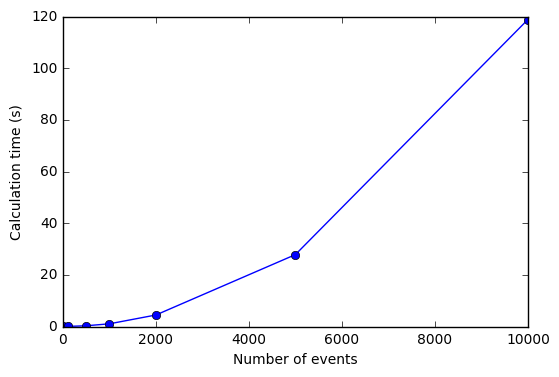

In [128]:
fig = plt.figure()
ax = fig.add_subplot(111)
num=[10,100,500,1000,2000,5000,10000]
time=[0.016,0.035,0.284,1.040,4.452,27.824,118.819]
ax.plot(num,time,'bo-',label='Cal. time')
param=np.polyfit(x, y, 2)
ax.set_xlabel('Number of events')
ax.set_ylabel('Calculation time (s)')
plt.show()